In [1]:
# Importing Packages------------
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create the connection ---------------------
cnx = sqlite3.connect("database.sqlite")
cnx.cursor()
player_attributes= pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
country=pd.read_sql_query("select * from Country;",cnx)
league=pd.read_sql_query("select * from League;",cnx)
match=pd.read_sql_query("select * from Match;",cnx)
player=pd.read_sql_query("select * from Player;",cnx)
team=pd.read_sql_query("select * from Team;",cnx)
team_attributes=pd.read_sql_query("select * from Team_Attributes;",cnx)

---------------------Analysis of each dataset--------------------------------

In [3]:
country.shape
country.info()
#country.select_dtypes(exclude=['float64','int64']).describe()
country.describe()
country.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 172.0+ bytes


id      0
name    0
dtype: int64

In [4]:
league.shape
league.info()
league.describe()
league.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 260.0+ bytes


id            0
country_id    0
name          0
dtype: int64

In [5]:
player.shape
player.info()
player.describe()
player.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 518.5+ KB


id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [6]:
match.shape
match.info()
match.select_dtypes(exclude=['float64','int64']).describe()
match.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 21.8+ MB


id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

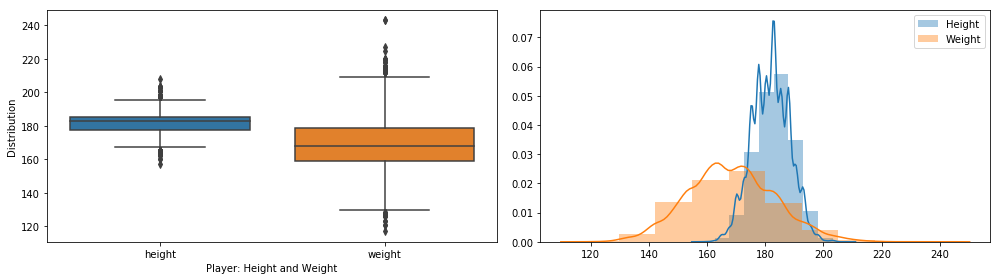

In [7]:
# Ploting the distribution of Height and Weight
fig1, ax1 = plt.subplots(nrows = 1, ncols = 2)
fig1.set_size_inches(14,4)
sns.boxplot(data = player.loc[:,["height",'weight']], ax = ax1[0])
ax1[0].set_xlabel('Player: Height and Weight')
ax1[0].set_ylabel('Distribution')
sns.distplot(a = player.loc[:,["height"]], bins= 10, kde = True, ax = ax1[1], label = 'Height')
sns.distplot(a = player.loc[:,["weight"]], bins= 10, kde = True, ax = ax1[1], label = 'Weight')
ax1[1].legend()
fig1.tight_layout()

In [8]:
# Player attributes analysis
player_attributes.shape
player_attributes.info()
player_attributes.describe()
player_attributes.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [9]:
np.unique(player_attributes.dtypes.values)
player_attributes.select_dtypes(include =['float64','int64']).head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [10]:
player_attributes.select_dtypes(include =['float64','int64']).head().\
loc[:,player_attributes.select_dtypes(include =['float64','int64']).columns[3:]].head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Feature analysis follows below -----------------

In [11]:
# selecting all attributes for float and int datatype
corr_player_attributes=player_attributes.select_dtypes(include=['float64','int64']).head().\
loc[:,player_attributes.select_dtypes(include=['float64','int64']).columns[3:]].corr()

In [12]:
#Number of nulls at column level
corr_player_attributes.isnull().sum(axis=0)

overall_rating         7
potential              7
crossing               7
finishing              7
heading_accuracy       7
short_passing          7
volleys                7
dribbling              7
curve                  7
free_kick_accuracy     7
long_passing           7
ball_control           7
acceleration          35
sprint_speed          35
agility               35
reactions              7
balance               35
shot_power             7
jumping               35
stamina               35
strength              35
long_shots             7
aggression             7
interceptions          7
positioning            7
vision                 7
penalties              7
marking                7
standing_tackle        7
sliding_tackle         7
gk_diving              7
gk_handling            7
gk_kicking             7
gk_positioning         7
gk_reflexes            7
dtype: int64

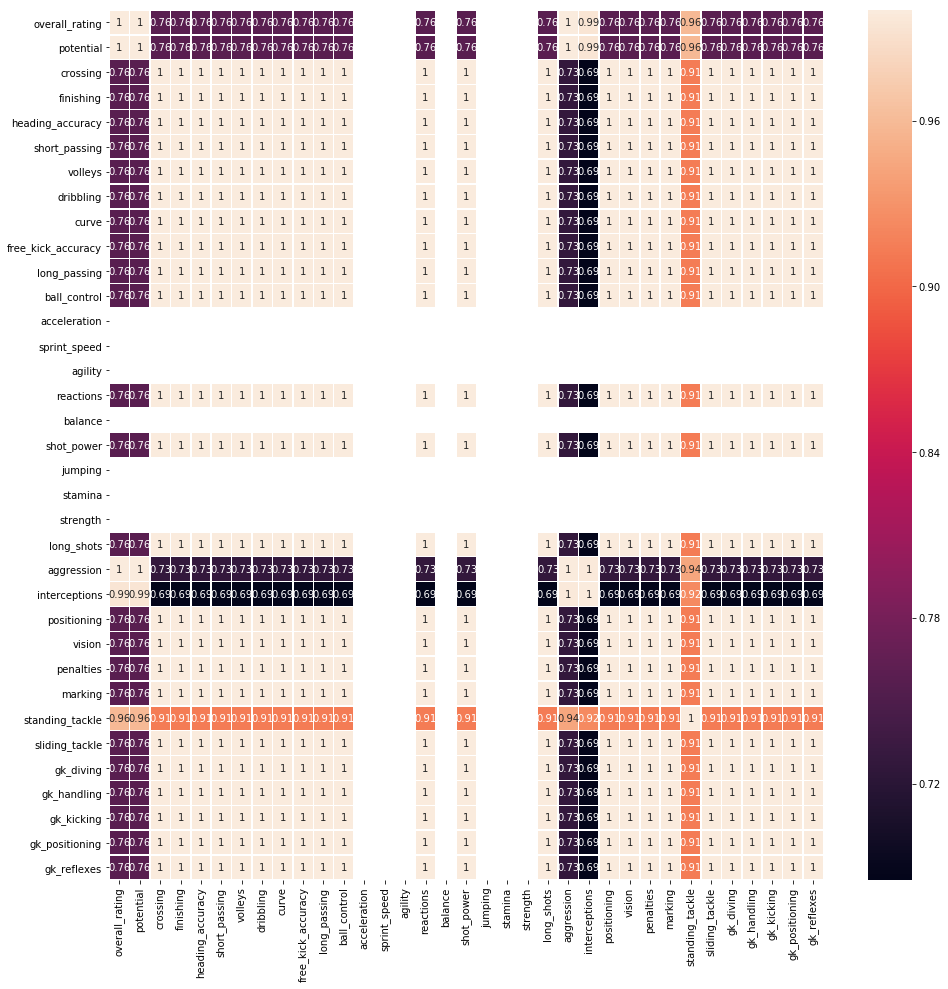

In [13]:
# correlation plot
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=16,h=16)
sns.heatmap(corr_player_attributes,annot = True,linewidths=0.5,ax = ax2)

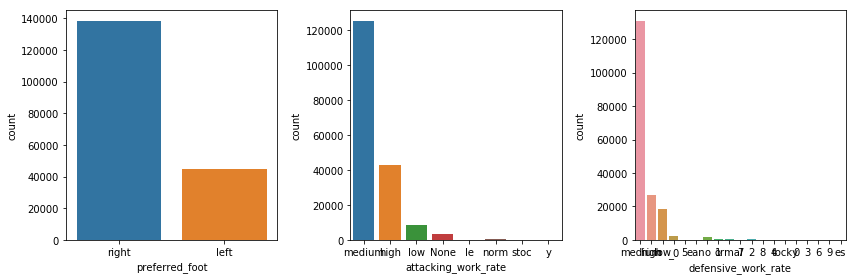

In [14]:
# feature analysis of few prominant fields
fig3,ax3=plt.subplots(nrows=1, ncols=3)
fig3.set_size_inches(12,4)
#player_attributes.select_dtypes(exclude=['float64','int64']).head()
sns.countplot(x=player_attributes['preferred_foot'],ax=ax3[0])
sns.countplot(x=player_attributes['attacking_work_rate'],ax=ax3[1])
sns.countplot(x=player_attributes['defensive_work_rate'],ax=ax3[2])
fig3.tight_layout()

In [15]:
print(player_attributes['attacking_work_rate'].value_counts())
print(player_attributes['defensive_work_rate'].value_counts())

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64
medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64


In [16]:
plyr_attr1=player_attributes.loc[(player_attributes['attacking_work_rate'].isin(['medium','high','low'])&player_attributes['defensive_work_rate'].isin(['medium','high','low'])),:]
plyr_attr1.shape
plyr_attr1.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


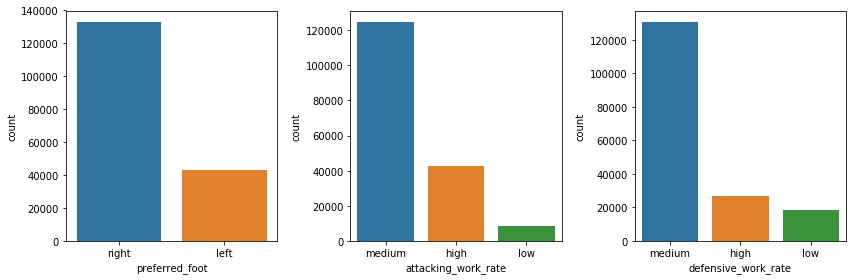

In [17]:
fig4,ax4=plt.subplots(nrows=1, ncols=3)
fig4.set_size_inches(12,4)
sns.countplot(x=plyr_attr1['preferred_foot'],ax=ax4[0])
sns.countplot(x=plyr_attr1['attacking_work_rate'],ax=ax4[1])
sns.countplot(x=plyr_attr1['defensive_work_rate'],ax=ax4[2])
fig4.tight_layout()

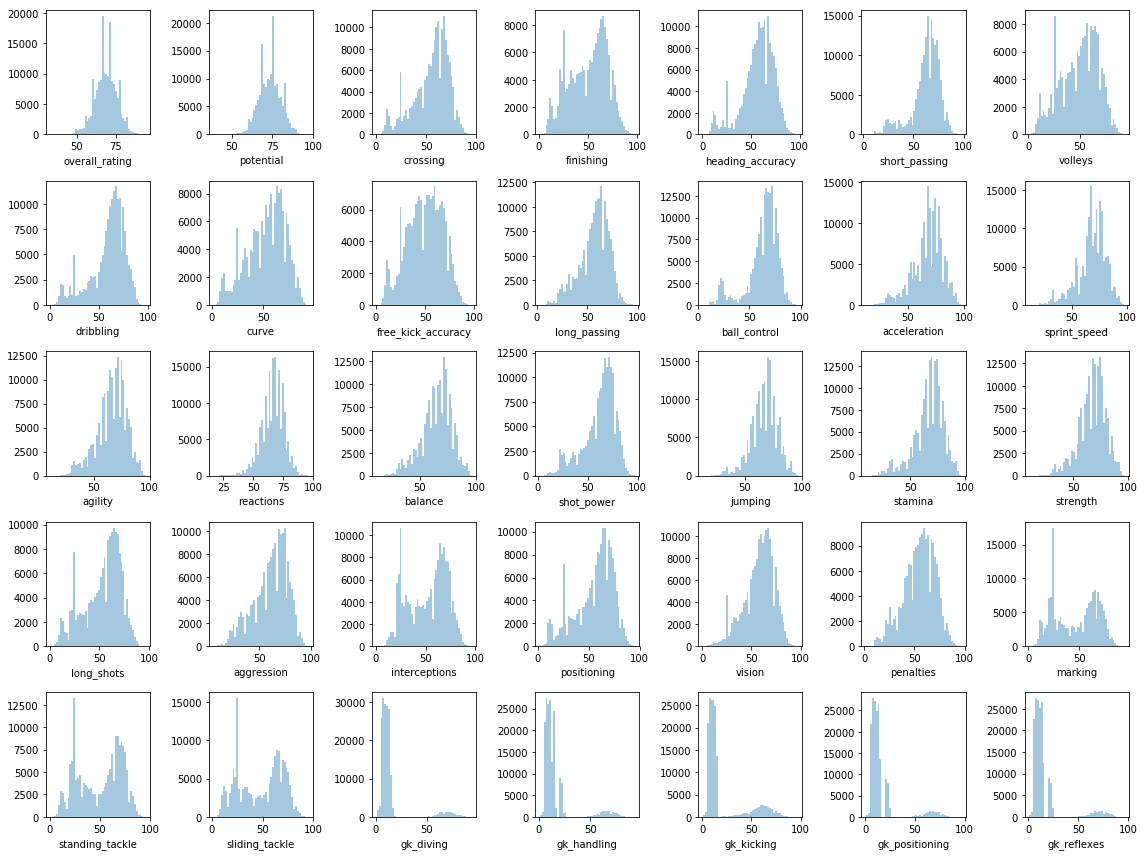

In [18]:
# All fields level distribution analysis--------
pat = plyr_attr1.loc[:,plyr_attr1.columns.tolist()[3:]]
# 4 columns have been removed and 3 columns are categorical. Hence only 35 graphs is required for distribution check
fig5, ax5 = plt.subplots(nrows=5,ncols=7)
fig5.set_size_inches(16,12)
for i,j in enumerate(pat.select_dtypes(include = ['float64','int64']).columns[:].tolist()):
    sns.distplot(pat.loc[:,j],kde = False,hist = True, ax = ax5[int(i/7)][i%7])
fig5.tight_layout()

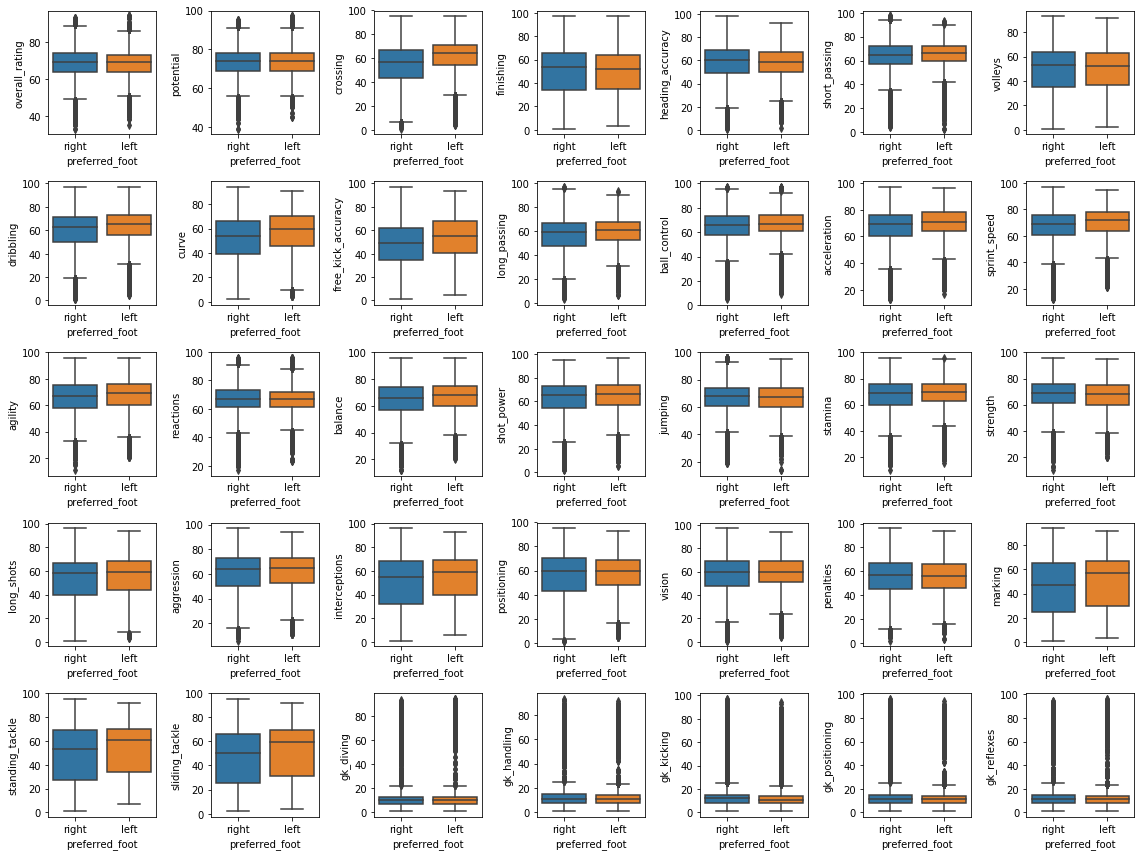

In [19]:
# boxplots for numerical variables vs preferred_foot-------------------
fig6,ax6=plt.subplots(nrows=5,ncols=7)
fig6.set_size_inches(16,12)
for i,j in enumerate(pat.select_dtypes(include=['float64','int64']).columns[:].tolist()):
    sns.boxplot(x='preferred_foot',y=j, data=pat,ax=ax6[int(i/7)][i%7])
fig6.tight_layout()

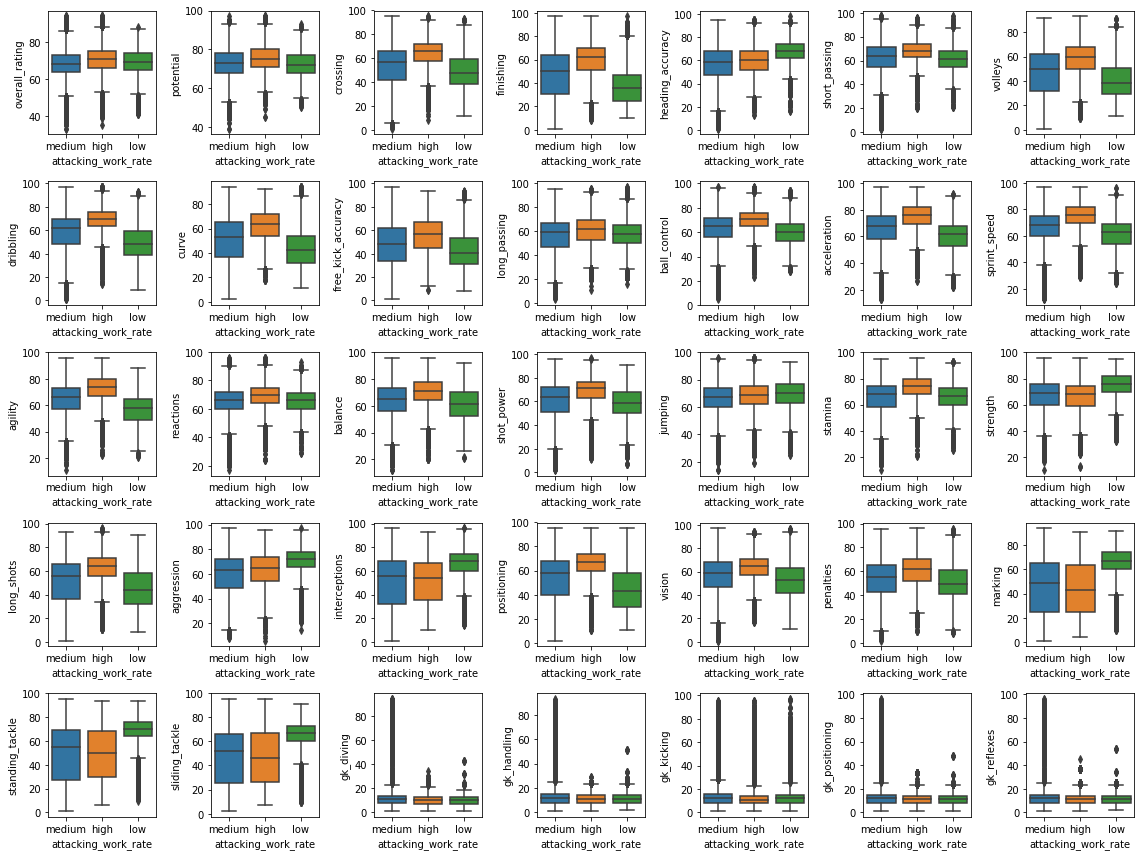

In [20]:
fig7,ax7=plt.subplots(nrows=5,ncols=7)
fig7.set_size_inches(16,12)
for i,j in enumerate(pat.select_dtypes(include=['float64','int64']).columns[:].tolist()):
    sns.boxplot(x='attacking_work_rate',y=j, data=pat,ax=ax7[int(i/7)][i%7])
fig7.tight_layout()

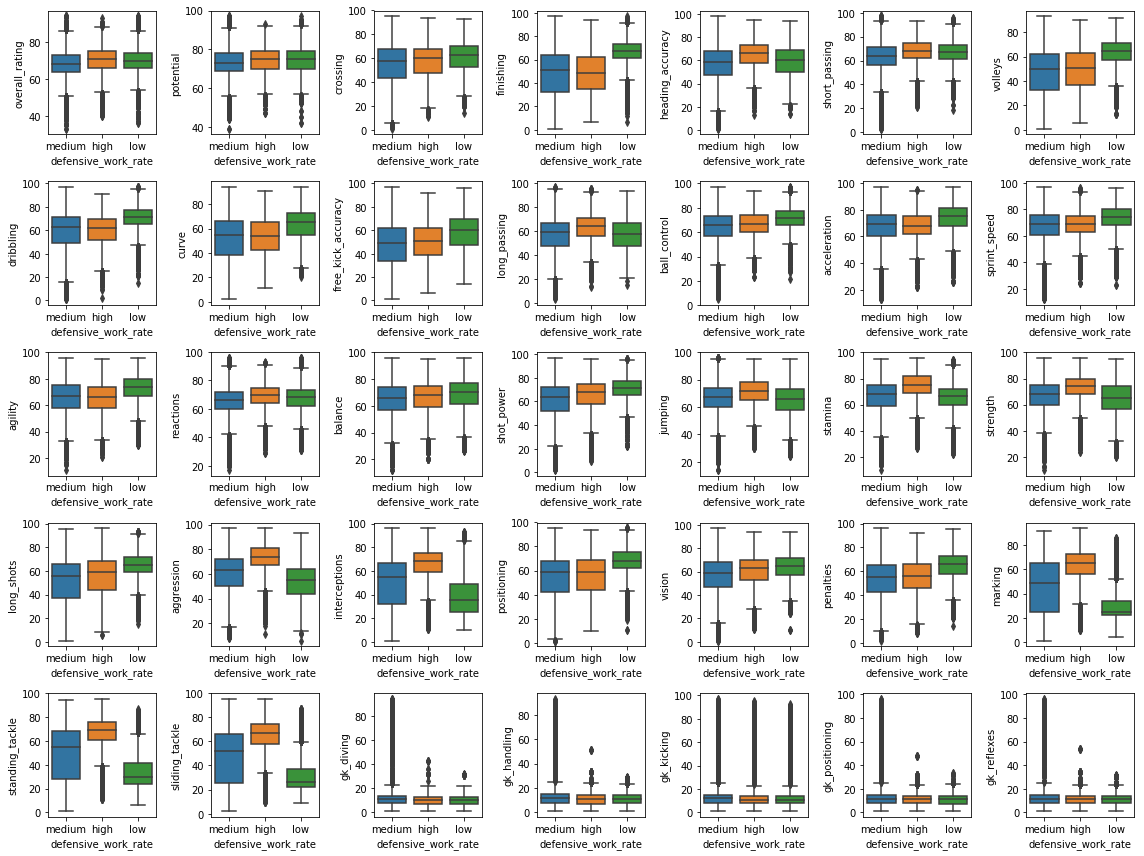

In [21]:
fig8,ax8=plt.subplots(nrows=5,ncols=7)
fig8.set_size_inches(16,12)
for i,j in enumerate(pat.select_dtypes(include=['float64','int64']).columns[:].tolist()):
    sns.boxplot(x='defensive_work_rate',y=j, data=pat,ax=ax8[int(i/7)][i%7])
fig8.tight_layout()

In [29]:
#Merge country and leauge data
country_league = country.merge(league,left_on="id",right_on="id",how="outer")
country_league = country_league.drop("id",axis = 1)
country_league = country_league.rename(columns={'name_x':"country", 'name_y':"league"})

In [30]:
match_new = match[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

match_new = match_new.drop("id",axis=1)

In [31]:
data = match_new.merge(country_league,left_on="country_id",right_on="country_id",how="outer")
data.isnull().sum()

country_id          0
league_id           0
season              0
stage               0
date                0
match_api_id        0
home_team_api_id    0
away_team_api_id    0
home_team_goal      0
away_team_goal      0
country             0
league              0
dtype: int64

In [32]:
data.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

In [33]:
data["date"] = pd.to_datetime(data["date"],format="%Y-%m-%d")
data["year"] = pd.DatetimeIndex(data["date"]).year

In [34]:
data = data.merge(team,left_on="home_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"home_team_lname",'team_short_name':"home_team_sname"})
data.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'year', 'home_team_lname',
       'home_team_sname'],
      dtype='object')

In [35]:
data = data.merge(team,left_on="away_team_api_id",right_on="team_api_id",how="left")
data = data.drop(["id","team_api_id",'team_fifa_api_id'],axis = 1)
data = data.rename(columns={ 'team_long_name':"away_team_lname",'team_short_name':"away_team_sname"})
data.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
       'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'country', 'league', 'year', 'home_team_lname',
       'home_team_sname', 'away_team_lname', 'away_team_sname'],
      dtype='object')

Preparing Player dataset for training and testing

In [36]:
player_info = player_attributes.merge(player,left_on="player_api_id",right_on="player_api_id",how="left")

In [37]:
team_info =  team_attributes.merge(team,left_on="team_api_id",right_on="team_api_id",how="left")
team_info = team_info.drop(['id_x','id_y', 'team_fifa_api_id_y'],axis=1)

In [38]:
player_info.columns

Index(['id_x', 'player_fifa_api_id_x', 'player_api_id', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'id_y', 'player_name', 'player_fifa_api_id_y',
       'birthday', 'height', 'weight'],
      dtype='object')

In [40]:
player_data=player_info.loc[(player_info['attacking_work_rate'].isin(['medium','high','low'])&player_info['defensive_work_rate'].isin(['medium','high','low'])),:]

In [41]:
player_data["year"] = pd.DatetimeIndex(player_data["birthday"]).year
player_data = player_data.drop(['date','id_x','player_fifa_api_id_x','player_api_id','birthday','player_fifa_api_id_y','player_name','id_y'], axis=1)
player_data.info()

C:\Users\PGDMB13049\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 41 columns):
overall_rating         176161 non-null float64
potential              176161 non-null float64
preferred_foot         176161 non-null object
attacking_work_rate    176161 non-null object
defensive_work_rate    176161 non-null object
crossing               176161 non-null float64
finishing              176161 non-null float64
heading_accuracy       176161 non-null float64
short_passing          176161 non-null float64
volleys                176161 non-null float64
dribbling              176161 non-null float64
curve                  176161 non-null float64
free_kick_accuracy     176161 non-null float64
long_passing           176161 non-null float64
ball_control           176161 non-null float64
acceleration           176161 non-null float64
sprint_speed           176161 non-null float64
agility                176161 non-null float64
reactions              176161 non-null float64

In [42]:
player_data.shape
player_data.isnull().sum(axis=0)

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
height                 0
weight                 0


In [ ]:
#dummy_1=pd.get_dummies(player_data['preferred_foot']).rename(columns=lambda x: 'preferred_foot_' + str(x))
#dummy_2=pd.get_dummies(player_data['attacking_work_rate']).rename(columns=lambda x: 'attacking_work_rate_' + str(x))
#dummy_3=pd.get_dummies(player_data['defensive_work_rate']).rename(columns=lambda x: 'defensive_work_rate_' + str(x))
#sample = player_data.append([dummy_1,dummy_2,dummy_3])
#sample = sample.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'], inplace=True, axis=1)

In [ ]:
*******Due to Memory issues with dummification/one hot encoding, I am labelling the categorical variable***********
System limitation has made me avoid dummification

In [43]:
cleanup_nums = {"preferred_foot":{"right":0,"left":1},"attacking_work_rate": {"low":0,"high":2,"medium":1},"defensive_work_rate": {"low":0,"high":2,"medium":1}}
player_data.replace(cleanup_nums, inplace=True)
player_data.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight,year
0,67.0,71.0,0,1,1,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,182.88,187,1992
1,67.0,71.0,0,1,1,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,182.88,187,1992
2,62.0,66.0,0,1,1,49.0,44.0,71.0,61.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,182.88,187,1992
3,61.0,65.0,0,1,1,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,182.88,187,1992
4,61.0,65.0,0,1,1,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,182.88,187,1992


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [45]:
cols = player_data.columns.values.tolist()
cols.remove('overall_rating')

In [46]:
x_Train,x_Test,y_Train,y_Test = train_test_split(player_data[cols],player_data['overall_rating'],test_size = 0.7,random_state=43)
lm = LinearRegression()
lm.fit(x_Train,y_Train)
np.sum(np.square(lm.predict(x_Train)-y_Train))

340626.9524204676

(-4.7004480286738355,
 98.70940860215053,
 -4.6110231046511165,
 96.83148519767343)

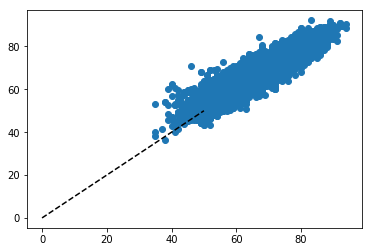

In [47]:
plt.scatter(y_Train, lm.predict(x_Train))
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')

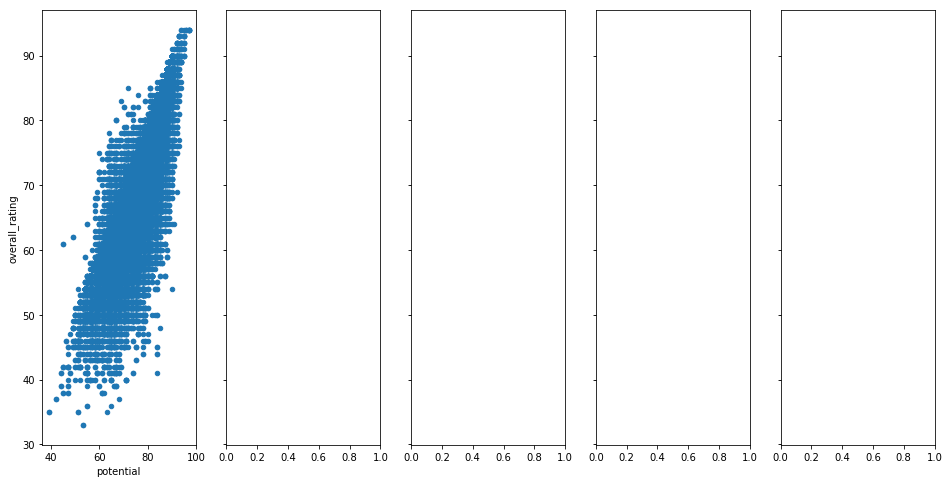

In [48]:
# Model is getting affected by below variables
fig , axs=plt.subplots(1,5,sharey=True)
player_data.plot(kind='scatter', x='potential', y='overall_rating',ax=axs[0], figsize=(16, 8))
#player_data.plot(kind='scatter',x='RM', y='overall_rating',ax=axs[1])
#player_data.plot(kind='scatter',x='DIS', y='overall_rating',ax=axs[2])
#player_data.plot(kind='scatter',x='PTRATIO', y='overall_rating',ax=axs[3])
#player_data.plot(kind='scatter',x='LSTAT', y='overall_rating',ax=axs[4])

In [50]:
# Variable preparation for LASSO run
X=player_data[cols]
Y=player_data['overall_rating']

In [51]:
# Using LASSO to find critical features
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=player_data[cols]
Y=player_data['overall_rating']
x_new = scaler.fit_transform(X)
names = player_data.columns
lasso = Lasso(alpha=.3)
lasso.fit(x_new, Y)
print(names,lasso.coef_)

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'height', 'weight', 'year'],
      dtype='object') [ 3.43654692  0.          0.          0.          0.          0.
  0.          0.30743935  0.          0.          0.          0.
  0.20485766  0.43381456  0.          0.          0.          2.20458724
 -0.          0.22746152  0.04201095  0.          0.61444814  0.
  0.          0.          0.          0.          0. 

In [52]:
import statsmodels.formula.api as smf

In [53]:
lm_new= smf.ols(formula='overall_rating~potential+ preferred_foot+ attacking_work_rate+defensive_work_rate+ crossing +finishing+ heading_accuracy+\
      short_passing +volleys+ dribbling+ curve+ free_kick_accuracy+long_passing+ ball_control +acceleration +sprint_speed+\
         agility+ reactions +balance+ shot_power +jumping +stamina+ strength +long_shots+ aggression +interceptions+ positioning+\
      vision +penalties+ marking+ standing_tackle +sliding_tackle+ gk_diving+ gk_handling +gk_kicking +gk_positioning+ gk_reflexes+ height+ weight+ year', data=player_data).fit()

lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 2.940e+04
Date:                Tue, 02 Oct 2018   Prob (F-statistic):               0.00
Time:                        12:05:34   Log-Likelihood:            -4.1381e+05
No. Observations:              176161   AIC:                         8.277e+05
Df Residuals:                  176120   BIC:                         8.281e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             672.7782      3.552    189.414      0.000     665.817     679.740
potential               0.4992      0.001    334.332      0.000       0.496       0.502
preferred_foot         -0.0095      0.015     -0.650      0.515      -0.038       0.019
attacking_work_rate    -0.0931      0.013     -6.917      0.000      -0.119      -0.067
defensive_work_rate    -0.0141      0.013     -1.046      0.296      -0.041       0.012
crossing                0.0022      0.001      2.748      0.006       0.001       0.004
finishing               0.0125      0.001     14.706      0.000       0.011       0.014
heading_accuracy        0.0521      0.001     66.952      0.000       0.051       0.054
short_passing           0.0580      0.001     45.252      0.000       0.055       0.060
volleys                -0.0043      0.001     -5.638      0.000      -0.006      -0.003
dribbling               0.0097      0.001      8.896      0.000       0.008       0.012
curve                   0.0107      0.001     14.391      0.000       0.009       0.012
free_kick_accuracy      0.0066      0.001      9.981      0.000       0.005       0.008
long_passing            0.0109      0.001     12.478      0.000       0.009       0.013
ball_control            0.1081      0.001     73.103      0.000       0.105       0.111
acceleration            0.0156      0.001     12.209      0.000       0.013       0.018
sprint_speed            0.0189      0.001     15.651      0.000       0.017       0.021
agility                -0.0047      0.001     -4.998      0.000      -0.007      -0.003
reactions               0.1684      0.001    163.428      0.000       0.166       0.170
balance                -0.0062      0.001     -8.035      0.000      -0.008      -0.005
shot_power              0.0120      0.001     14.741      0.000       0.010       0.014
jumping                 0.0112      0.001     16.670      0.000       0.010       0.013
stamina                 0.0065      0.001      8.524      0.000       0.005       0.008
strength                0.0524      0.001     61.273      0.000       0.051       0.054
long_shots             -0.0073      0.001     -8.558      0.000      -0.009      -0.006
aggression              0.0043      0.001      6.649      0.000       0.003       0.006
interceptions          -0.0025      0.001     -3.580      0.000      -0.004      -0.001
positioning            -0.0088      0.001    -11.934      0.000      -0.010      -0.007
vision                 -0.0222      0.001    -27.116      0.000      -0.024      -0.021
penalties               0.0015      0.001      2.188      0.029       0.000       0.003
marking                 0.0243      0.001     23.422      0.000       0.022       0.026
standing_tackle         0.0074      0.001      6.151      0.000       0.005       0.010
sli

In [54]:
lm_new= smf.ols(formula='overall_rating~potential+ attacking_work_rate+ crossing +finishing+ heading_accuracy+\
      short_passing +volleys+ dribbling+ curve+ free_kick_accuracy+long_passing+ ball_control +acceleration +sprint_speed+\
         agility+ reactions +balance+ shot_power +jumping +stamina+ strength +long_shots+ aggression +interceptions+ positioning+\
      vision + marking+ standing_tackle +sliding_tackle+ gk_diving+ gk_handling +gk_kicking +gk_positioning+ gk_reflexes+ height+ weight+ year', data=player_data).fit()

lm_new.summary()

MemoryError: 

In [18]:
lm_new= smf.ols(formula='overall_rating~potential+ attacking_work_rate+ finishing+ heading_accuracy+\
      short_passing +volleys+ dribbling+ curve+ free_kick_accuracy+long_passing+ ball_control +acceleration +sprint_speed+\
         agility+ reactions +balance+ shot_power +jumping +stamina+ strength +long_shots+ aggression +interceptions+ positioning+\
      vision + marking+ standing_tackle +sliding_tackle+ gk_diving+ gk_handling +gk_kicking +gk_positioning+ gk_reflexes+ height+ weight+ year', data=player_data).fit()

lm_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 3.267e+04
Date:                Mon, 10 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:43:40   Log-Likelihood:            -4.1381e+05
No. Observations:              176161   AIC:                         8.277e+05
Df Residuals:                  176124   BIC:                         8.281e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             674.9438      3.500    192.846      0.000     668.084     681.804
potential               0.4991      0.001    335.661      0.000       0.496       0.502
attacking_work_rate    -0.0921      0.013     -6.858      0.000      -0.118      -0.066
finishing               0.0127      0.001     15.008      0.000       0.011       0.014
heading_accuracy        0.0522      0.001     67.601      0.000       0.051       0.054
short_passing           0.0582      0.001     45.740      0.000       0.056       0.061
volleys                -0.0042      0.001     -5.524      0.000      -0.006      -0.003
dribbling               0.0102      0.001      9.654      0.000       0.008       0.012
curve                   0.0111      0.001     15.469      0.000       0.010       0.013
free_kick_accuracy      0.0070      0.001     10.832      0.000       0.006       0.008
long_passing            0.0114      0.001     13.244      0.000       0.010       0.013
ball_control            0.1083      0.001     73.364      0.000       0.105       0.111
acceleration            0.0158      0.001     12.388      0.000       0.013       0.018
sprint_speed            0.0192      0.001     15.955      0.000       0.017       0.022
agility                -0.0048      0.001     -5.131      0.000      -0.007      -0.003
reactions               0.1684      0.001    163.504      0.000       0.166       0.170
balance                -0.0061      0.001     -7.972      0.000      -0.008      -0.005
shot_power              0.0121      0.001     14.869      0.000       0.010       0.014
jumping                 0.0111      0.001     16.525      0.000       0.010       0.012
stamina                 0.0064      0.001      8.533      0.000       0.005       0.008
strength                0.0523      0.001     61.281      0.000       0.051       0.054
long_shots             -0.0072      0.001     -8.501      0.000      -0.009      -0.006
aggression              0.0042      0.001      6.566      0.000       0.003       0.005
interceptions          -0.0025      0.001     -3.689      0.000      -0.004      -0.001
positioning            -0.0082      0.001    -11.544      0.000      -0.010      -0.007
vision                 -0.0222      0.001    -27.228      0.000      -0.024      -0.021
marking                 0.0245      0.001     23.647      0.000       0.022       0.027
standing_tackle         0.0073      0.001      6.065      0.000       0.005       0.010
sliding_tackle         -0.0160      0.001    -15.667      0.000      -0.018      -0.014
gk_diving               0.1467      0.001    108.010      0.000       0.144       0.149
gk_handling             0.0247      0.002     13.971      0.000       0.021       0.028
gk_kicking             -0.0526      0.001    -89.252      0.000      -0.054      -0.051
gk_

Text(0.5,1,'Actual Rating vs Predicted Rating')

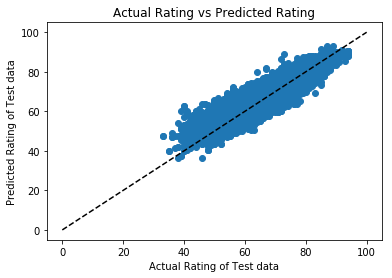

In [56]:
# Testing the model will shortlisted features.....
y_pred_test = lm_new.predict(x_Test)
plt.scatter(y_Test, y_pred_test)
plt.plot([0, 100], [0, 100], '--k')
plt.axis('tight')
plt.xlabel("Actual Rating of Test data")
plt.ylabel("Predicted Rating of Test data")
plt.title("Actual Rating vs Predicted Rating")

In [57]:
np.sum(np.square(y_pred_test-y_Test))

791087.1750786899